In [1]:
# import relevant packages
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
import Train

#### Split and Preprocess The Data

In [3]:
x_train, y_train, x_test, y_test = Train.load_mnist()

input_shape = 784
hidden_shape = [512, 512]
output_shape = 10
x_test = x_test.reshape((x_test.shape[0], -1))
y_test = to_categorical(y_test, num_classes=output_shape)

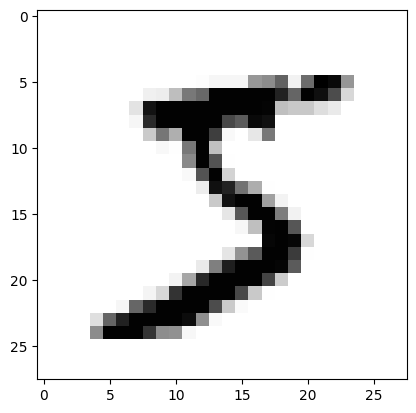

In [4]:
#display the first image of the train set to verify it's all set
first_image = x_train[0]

# Reshaping the image to its original dimensions
first_image = first_image.reshape((28, 28))
plt.imshow(first_image, cmap='Greys', interpolation='None')

## Train The MNIST model

Epoch 0 - Loss: 0.23669187688819462 - Accuracy: 0.11858333333333333
Epoch 10 - Loss: 0.10729187543289967 - Accuracy: 0.7782833333333333
Epoch 20 - Loss: 0.0919623908528576 - Accuracy: 0.7672833333333333
Epoch 30 - Loss: 0.05332648418574178 - Accuracy: 0.8229833333333333
Epoch 40 - Loss: 0.0455562619955497 - Accuracy: 0.8572333333333333
Epoch 50 - Loss: 0.04529780011179446 - Accuracy: 0.8633
Epoch 60 - Loss: 0.041610395861789766 - Accuracy: 0.87215
Epoch 70 - Loss: 0.03896040575693065 - Accuracy: 0.8804
Epoch 80 - Loss: 0.03669762025266042 - Accuracy: 0.8877
Epoch 90 - Loss: 0.03457346784393602 - Accuracy: 0.8946833333333334


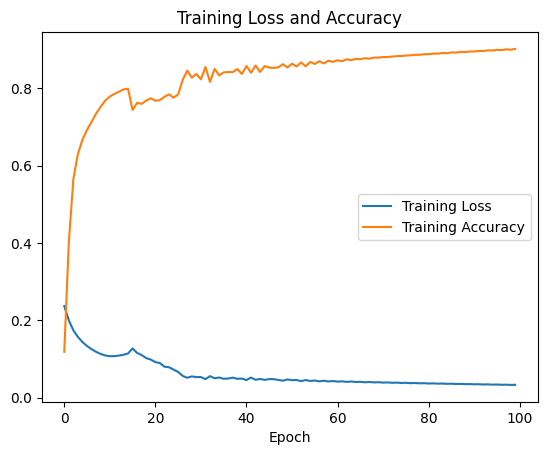

In [17]:
nn = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape)
nn.train(x_train, y_train, initial_learning_rate=0.001, decay=0.001, n_epochs=100, plot_training_results=True)

#### Evaluate the model on the test 

In [18]:
print("Test Loss:", Train.test_loss(nn, x_test, y_test))
print("Test Accuracy:", Train.test_accuracy(nn, x_test, y_test))

Test Loss: 0.21557565348311
Test Accuracy: 0.9041


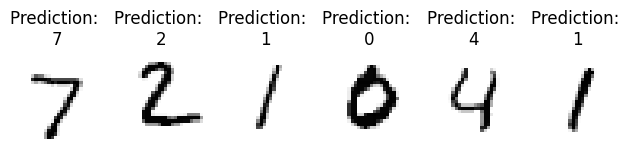

In [21]:
# display some model guesses
model_guesses = Train.get_prediction(nn, samples=x_test)

for idx, i in enumerate([i for i in range(6)]):
# for idx, i in enumerate([0, 5, 10, 15, 20, 25]):
    plt.subplot(1, 6, idx + 1)  # Create subplots in a row
    first_image_guess = model_guesses[i]
    first_image = x_test[i]

    # Reshaping the image to its original dimensions
    first_image = first_image.reshape((28, 28))
    plt.imshow(first_image, cmap='Greys', interpolation='None')
    plt.title(f"Prediction: \n{np.argmax(first_image_guess)}")  # Set subplot title
    plt.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()